# Distribución, muestreo, intervalo de confianza y prueba de hipótesis

1. Si el diámetro del tronillo puede modelarse con una distribución normal con media $1.121$ y una desviación estándar de $0.0020$. Explique mediante gráficos y calcule el valor de las siguientes preguntas:
    1. ¿Cuál es la probabilidad de que el diámetro sea mayor que $1.120$?
    2. ¿Cuál es la probabilidad de que el diámetro se encuentre entre $1.118$ y $1.124$?
    3. ¿Cuál es el valor de diámetro para el cual la probabilidad excede el 95%?

### Solución

La distribución normal viene dada por $f_x (x; \mu, \sigma) = {1 \over {\sigma \sqrt{2 \pi}}} e^{{-(x-\mu)^2} \over {2 \sigma^2}}$ donde $\mu$ es la media y $\sigma$ la desviación estándar.

Así, la distribución de probabilidad para el diámetro del tornillo será $f(x) = {1 \over {0.0020 \sqrt{2 \pi}}} e^{{-(x-1.121)^2} \over {2*0.0020^2}}$

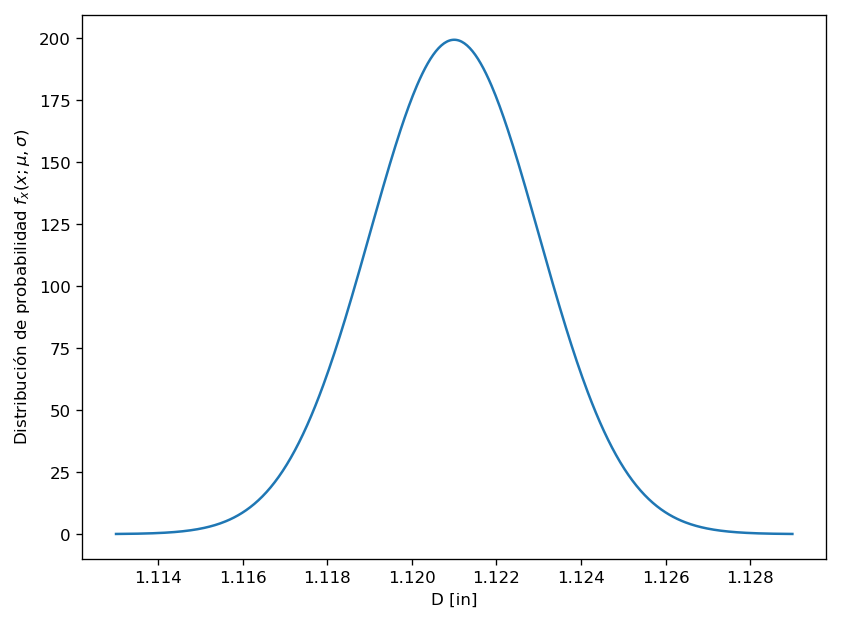

In [7]:
import matplotlib.pyplot as plt
import numpy as np

mu = 1.121
sigma = 0.0020

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma,500)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

plt.figure(figsize=(8,6),dpi=120)
plt.plot(x,y)
plt.xlabel('D [in]')
plt.ylabel('Distribución de probabilidad $f_x (x; \mu, \sigma)$')
plt.show()

 A.La probabilidad de que el diámetro sea mayor que $1.120$ será


$$\int_{1.120}^{\infty} {1 \over {0.0020 \sqrt{2 \pi}}} e^{{-(x-1.121)^2} \over {2*0.0020^2}} dx$$

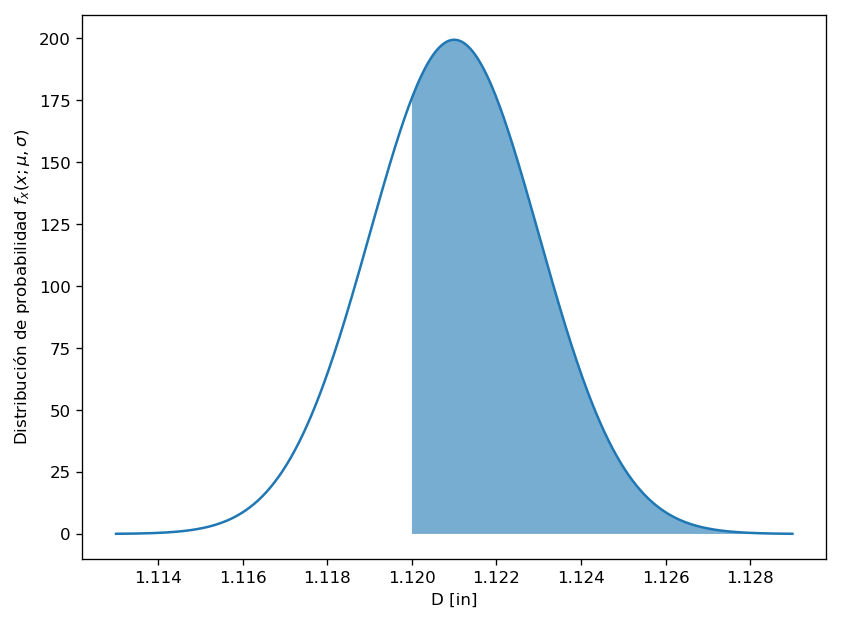

In [8]:
x_f = np.linspace(1.120, mu + 4 * sigma,500)
y_f = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x_f - mu) ** 2 / (2 * sigma ** 2))

plt.figure(figsize=(8,6),dpi=120)
plt.plot(x,y)
plt.fill_between(x_f, y_f, alpha = 0.6)
plt.xlabel('D [in]')
plt.ylabel('Distribución de probabilidad $f_x (x; \mu, \sigma)$')
plt.show()

In [15]:
# Librería de algebra simbólica
import sympy as sym
sym.init_printing()
x = sym.Symbol('x')

In [16]:
sym.integrate(1 / (0.0020 * sym.sqrt(2 * sym.pi)) * 
          sym.exp(-(x-1.121)**2 / (2*(0.0020**2))),
          (x, 1.120, sym.oo))

In [19]:
sym.integrate(1 / (0.0020 * sym.sqrt(2 * sym.pi)) * 
          sym.exp(-(x-1.121)**2 / (2*(0.0020**2))),
          (x, 1.120, sym.oo)).n(8)

Se puede realizar sin integrar usando la distribución acumulada que viene definida como $P(X < x) = f(x;\mu,\sigma) = \int_{-\infty}^{x} {1 \over {\sigma \sqrt{2 \pi}}} e^{{-(t-\mu)^2} \over {2 \sigma^2}} dt$

$P(X > 1.120) = 1 - P(X < 1.110)$

In [20]:
import numpy as np
from scipy import stats

std = 0.0020
mu = 1.121

# CDF = Cumulative distribution function
1 - stats.norm.cdf(1.120, loc=mu, scale=std)

 B.La probabilidad de que se encuentre entre $1.118$ y $1.124$ es de 

$P(1.118<X<1.124) = P (X < 1.124) - P(1.118 < X)$

In [21]:
P_1124 = stats.norm.cdf(1.124, loc=mu, scale=std)
P_1118 = stats.norm.cdf(1.118, loc=mu, scale=std)
P_1124 - P_1118

El valor del diámetro para el cual la probabilidad excede el 95% se calcula usando la inversa

In [22]:
# Percent point function (inverse of `cdf`)
stats.norm.ppf(0.95, loc=mu, scale=std)

### Verificación de normalidad (Gráfica de probabilidad)

In [23]:
import pandas as pd

data = pd.read_excel("./Data.xls")
data

,LP,Op,Hora,SF,D,HS
0,1,1,1,1,1.1241,0.138
1,1,1,2,0,1.1191,0.137
2,1,1,3,0,1.1181,0.141
3,1,1,4,0,1.1233,0.139
4,1,1,5,1,1.1192,0.137
5,1,1,6,0,1.1230,0.139
6,1,1,7,0,1.1195,0.137
7,1,1,8,1,1.1261,0.137
8,1,1,9,0,1.1188,0.138
9,1,1,10,0,1.1187,0.137


In [24]:
datos_ord = data.sort_values(by = "D")
datos_ord.index = np.arange(1,201)
datos_ord

,LP,Op,Hora,SF,D,HS
1,1,10,3,0,1.1166,0.138
2,1,9,3,1,1.1171,0.137
3,1,4,6,0,1.1173,0.140
4,1,9,4,0,1.1175,0.137
5,1,6,4,0,1.1178,0.137
6,1,6,5,0,1.1180,0.139
7,1,5,3,0,1.1181,0.141
8,1,1,3,0,1.1181,0.141
9,1,7,8,0,1.1182,0.140
10,1,5,9,1,1.1184,0.140


In [25]:
data_dia = pd.DataFrame({
    "j": np.arange(1,201),
    "X(j)": datos_ord["D"],
    },index = np.arange(1,201))
data_dia

,X(j),j
1,1.1166,1
2,1.1171,2
3,1.1173,3
4,1.1175,4
5,1.1178,5
6,1.1180,6
7,1.1181,7
8,1.1181,8
9,1.1182,9
10,1.1184,10


In [26]:
tabla_prob_norm = pd.DataFrame({
     "j": np.arange(1,201),
    "X(j)": datos_ord["D"],
    "(j-0.5)/200": (data_dia["j"] - 0.5) / 200
    },index = np.arange(1,201))
tabla_prob_norm

,(j-0.5)/200,X(j),j
1,0.0025,1.1166,1
2,0.0075,1.1171,2
3,0.0125,1.1173,3
4,0.0175,1.1175,4
5,0.0225,1.1178,5
6,0.0275,1.1180,6
7,0.0325,1.1181,7
8,0.0375,1.1181,8
9,0.0425,1.1182,9
10,0.0475,1.1184,10


In [27]:
tabla_prob_norm2 = pd.DataFrame({
     "j": np.arange(1,201),
    "X(j)": datos_ord["D"],
    "(j-0.5)/200": (data_dia["j"] - 0.5) / 200,
    "Puntajes Z(j)": stats.norm.ppf(tabla_prob_norm["(j-0.5)/200"])
    },index = np.arange(1,201))
tabla_prob_norm2

,(j-0.5)/200,Puntajes Z(j),X(j),j
1,0.0025,-2.807034,1.1166,1
2,0.0075,-2.432379,1.1171,2
3,0.0125,-2.241403,1.1173,3
4,0.0175,-2.108358,1.1175,4
5,0.0225,-2.004654,1.1178,5
6,0.0275,-1.918876,1.1180,6
7,0.0325,-1.845258,1.1181,7
8,0.0375,-1.780464,1.1181,8
9,0.0425,-1.722384,1.1182,9
10,0.0475,-1.669593,1.1184,10


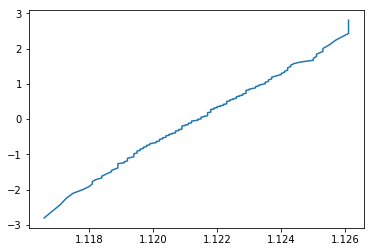

In [28]:
plt.plot(tabla_prob_norm2["X(j)"], tabla_prob_norm2["Puntajes Z(j)"])
plt.show()

 2.Calcular los intervalos de confianza al 95% y al 98% de cada una de las 20 muestras, asumiendo que se sabe que la desviación estándar poblacional es $0.0020$ y que la media muestral está distribuida de forma normal o que cumple con el Teorema de Límite Central. Deben presentar un análisis de los resultados.


### Solución

Se cargan los datos

In [29]:
import pandas as pd

data = pd.read_excel("./Data.xls")
data

,LP,Op,Hora,SF,D,HS
0,1,1,1,1,1.1241,0.138
1,1,1,2,0,1.1191,0.137
2,1,1,3,0,1.1181,0.141
3,1,1,4,0,1.1233,0.139
4,1,1,5,1,1.1192,0.137
5,1,1,6,0,1.1230,0.139
6,1,1,7,0,1.1195,0.137
7,1,1,8,1,1.1261,0.137
8,1,1,9,0,1.1188,0.138
9,1,1,10,0,1.1187,0.137


El intervalo de confianza de un $100(1-\alpha)\%$ para una media $\mu$ y una desviación estándar $\sigma$ se puede calcular mediante la fórmula

$$\big({\mu - z_{\alpha / 2} {{\sigma} \over {\sqrt{n}}},\mu + z_{\alpha / 2} {{\sigma} \over {\sqrt{n}}}}\big)$$

Se da como dato la desviación estándar

In [30]:
std = 0.0020

Se deben calcular cada una de las medias

In [31]:
media_op1 = data[(data['Op'] == 1) & (data['LP'] == 1)][['D']].mean()
media_op2 = data[(data['Op'] == 2) & (data['LP'] == 1)][['D']].mean()
media_op3 = data[(data['Op'] == 3) & (data['LP'] == 1)][['D']].mean()
media_op4 = data[(data['Op'] == 4) & (data['LP'] == 1)][['D']].mean()
media_op5 = data[(data['Op'] == 5) & (data['LP'] == 1)][['D']].mean()
media_op6 = data[(data['Op'] == 6) & (data['LP'] == 1)][['D']].mean()
media_op7 = data[(data['Op'] == 7) & (data['LP'] == 1)][['D']].mean()
media_op8 = data[(data['Op'] == 8) & (data['LP'] == 1)][['D']].mean()
media_op9 = data[(data['Op'] == 9) & (data['LP'] == 1)][['D']].mean()
media_op10 = data[(data['Op'] == 10) & (data['LP'] == 1)][['D']].mean()
media_op11 = data[(data['Op'] == 1) & (data['LP'] == 2)][['D']].mean()
media_op12 = data[(data['Op'] == 2) & (data['LP'] == 2)][['D']].mean()
media_op13 = data[(data['Op'] == 3) & (data['LP'] == 2)][['D']].mean()
media_op14 = data[(data['Op'] == 4) & (data['LP'] == 2)][['D']].mean()
media_op15 = data[(data['Op'] == 5) & (data['LP'] == 2)][['D']].mean()
media_op16 = data[(data['Op'] == 6) & (data['LP'] == 2)][['D']].mean()
media_op17 = data[(data['Op'] == 7) & (data['LP'] == 2)][['D']].mean()
media_op18 = data[(data['Op'] == 8) & (data['LP'] == 2)][['D']].mean()
media_op20 = data[(data['Op'] == 10) & (data['LP'] == 2)][['D']].mean()

Usando ciclo for

In [32]:
media = np.zeros(20)
for i in range(10):
    media[i] = media_op1 = data[(data['Op'] == i + 1) & (data['LP'] == 1)][['D']].mean()
    media[i + 10] = media_op11 = data[(data['Op'] == i + 1) & (data['LP'] == 2)][['D']].mean()
    
pd.DataFrame(media)

,0
0,1.12099
1,1.12220
2,1.12289
3,1.12284
4,1.12193
5,1.12122
6,1.12150
7,1.12160
8,1.12110
9,1.12081


Calculamos $\sqrt{n} = \sqrt{10}$

In [33]:
sqrt_n = np.sqrt(10)

El $z_{\alpha/2}$ lo podemos calcular usando la inversa de la distribución normal

Al $95\%$ $z_{\alpha/2}=z_{5/2}$

In [34]:
z_95 = stats.norm.ppf(1-(5/2)/100)
z_95

Al $98\%$ $z_{\alpha/2}=z_{2/2}=z_1$

In [35]:
z_98 = stats.norm.ppf(1-1/100)
z_98

In [36]:
intervalo_conf = pd.DataFrame({
    "1 Media": media,
    "2 Límite inferior 95%": media - z_95 * std / sqrt_n,
    "3 Límite superior 95%": media + z_95 * std / sqrt_n,
    "4 Límite inferior 98%": media - z_98 * std / sqrt_n,
    "5 Límite superior 98%": media + z_98 * std / sqrt_n
}, index = np.arange(1,21))
intervalo_conf

,1 Media,2 Límite inferior 95%,3 Límite superior 95%,4 Límite inferior 98%,5 Límite superior 98%
1,1.12099,1.11975,1.12223,1.119519,1.122461
2,1.12220,1.12096,1.12344,1.120729,1.123671
3,1.12289,1.12165,1.12413,1.121419,1.124361
4,1.12284,1.12160,1.12408,1.121369,1.124311
5,1.12193,1.12069,1.12317,1.120459,1.123401
6,1.12122,1.11998,1.12246,1.119749,1.122691
7,1.12150,1.12026,1.12274,1.120029,1.122971
8,1.12160,1.12036,1.12284,1.120129,1.123071
9,1.12110,1.11986,1.12234,1.119629,1.122571
10,1.12081,1.11957,1.12205,1.119339,1.122281


 3.El fabricante quisiera afirmar que los tornillos NAS 144 tienen un diámetro promedio de $1.120$ y que el 95% cumple con tal especificación. Para investigar tal afirmación cada uno debe realizar una prueba estadística con la muestra de 10 tornillos que obtuvo aleatoriamente. Realice las suposiciones que considere necesarias para comprobar si cumpliría con tal afirmación. Dé una interpretación de su respuesta.

### Solución

Para probar la hipótesis del fabricante se debe realizar una prueba de la media con la varianza desconocida.

Sea $X$ la variable aleatoria correspondiente al diámetro del tornillos NAS 144 con una media $\mu$ y varianza $\sigma^2$, ambas desconocidas. Se quiere probar la hipótesis que la media es igual a $1.120$.Entonces la hipótesis a probar es

$$H_0: \mu = 1.120$$
$$H_A: \mu \neq 1.120$$

Para probar esta hipótesis se toma la muestra aleatoria de $10$ tornillos y se calcula el estadístico de prueba

$$t_0 = {{\bar{X}-\mu_0}\over{{S \over \sqrt{n}}}}$$

donde $S$ es la desviación estándar de los datos bajo el supuesto de que $H_0$ es verdadera, este estadístico tiene una distribución T de Student con $n-1$ grados de libertad. Se rechaza $H_0$ si el valor absoluto del estadístico de prueba es mayor que el valor crítico de la distribución, es decir, se rechaza si $|t_0| > t_{\alpha/2}$. Siendo $t_{\alpha/2}$ el punto crítico de la distribución T de Student, tal que $P(t>t_{\alpha/2})=\alpha/2$; o sea, las áreas bajo la curva a la derecha del punto $t_{\alpha/2}$ y a la izquierda del punto $-t_{\alpha/2}$ son iguales a $\alpha/2$

Seleccionamos los datos del operador (muestra aleatoria)

In [37]:
data_operador = data[(data['Op'] == 1) & (data['LP'] == 1)]

data_operador

,LP,Op,Hora,SF,D,HS
0,1,1,1,1,1.1241,0.138
1,1,1,2,0,1.1191,0.137
2,1,1,3,0,1.1181,0.141
3,1,1,4,0,1.1233,0.139
4,1,1,5,1,1.1192,0.137
5,1,1,6,0,1.1230,0.139
6,1,1,7,0,1.1195,0.137
7,1,1,8,1,1.1261,0.137
8,1,1,9,0,1.1188,0.138
9,1,1,10,0,1.1187,0.137


Calculamos la media y la desviación estandar de la muestra

In [38]:
x = data_operador[['D']].mean()[0]
x

In [39]:
s = data_operador[['D']].std()[0]
s

In [40]:
n = 10

In [41]:
t_0 = (x - 1.120) / (s / np.sqrt(n))
t_0

Buscamos en los valores críticos de la distribución T de Student de $10 -1=9$ grados de libretad

In [42]:
stats.t.isf([0.025],[9])[0]

Como $|t_0| = 1.1026 < t_{\alpha/2} = 2.2621$ se rechaza la afirmación del fabricante.

## Regresión lineal

Se importa la data

In [43]:
import pandas as pd

data_regresion = pd.read_excel("./data_regresión.xls")
data_regresion

,Diámetro,Velocidad de corte (acabado),RPM husillo,% Desgaste herramienta,Velocidad de corte desbaste
0,1.1166,203,2249,23,140
1,1.1210,204,2250,45,138
2,1.1198,204,2250,38,140
3,1.1233,206,2250,58,138
4,1.1215,205,2250,52,142
5,1.1222,205,2250,53,140
6,1.1225,205,2251,55,141
7,1.1219,205,2251,53,141
8,1.1191,203,2249,32,139
9,1.1207,204,2249,44,138


In [44]:
import statsmodels.api as sm

/home/eduardo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Las x o variable independiente es el diámetro

In [45]:
X = data_regresion[["Diámetro"]]
X

,Diámetro
0,1.1166
1,1.1210
2,1.1198
3,1.1233
4,1.1215
5,1.1222
6,1.1225
7,1.1219
8,1.1191
9,1.1207


Las y o variables independientes son los parámetros a relacionar

In [46]:
Y = data_regresion[['Velocidad de corte (acabado)', 'RPM husillo',
       '% Desgaste herramienta', 'Velocidad de corte desbaste']]
Y

,Velocidad de corte (acabado),RPM husillo,% Desgaste herramienta,Velocidad de corte desbaste
0,203,2249,23,140
1,204,2250,45,138
2,204,2250,38,140
3,206,2250,58,138
4,205,2250,52,142
5,205,2250,53,140
6,205,2251,55,141
7,205,2251,53,141
8,203,2249,32,139
9,204,2249,44,138


In [47]:
X = data_regresion[['Velocidad de corte (acabado)', 'RPM husillo',
       '% Desgaste herramienta']]
y = data_regresion[["Diámetro"]]

X = sm.add_constant(X)
resultados = sm.OLS(y, X).fit()

resultados.summary()

/home/eduardo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diámetro   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     64.02
Date:                Fri, 27 Oct 2017   Prob (F-statistic):           1.18e-07
Time:                        18:17:42   Log-Likelihood:                 97.670
No. Observations:                  16   AIC:                            -187.3
Df Residuals:                      12   BIC:                            -184.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.4256      0.602      2.368      0.036       0.114       2.738
Velocidad de corte (acabado)  3.959e-05      0.001      0.067      0.948      -0.001       0.001
RPM husillo                     -0.0001      0.000     -0.571      0.579      -0.001       0.000
% Desgaste herramienta           0.0002   5.67e-05      3.311      0.006    6.42e-05       0.000
==============================================================================
Omnibus:                        1.739   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.228
Skew:                           0.650   Prob(JB):                        0.541
Kurtosis:                       2.608   Cond. No.                     8.72e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

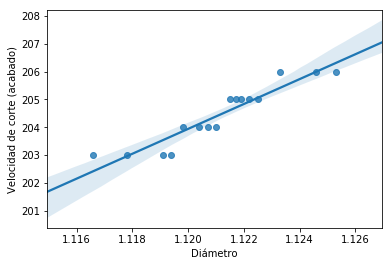

In [54]:
import seaborn as sns
%matplotlib inline

sns.regplot(x="Diámetro", y="Velocidad de corte (acabado)", data=data_regresion)

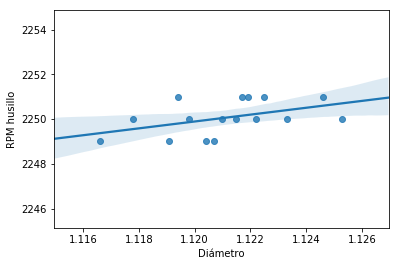

In [55]:
sns.regplot(x="Diámetro", y="RPM husillo", data=data_regresion)

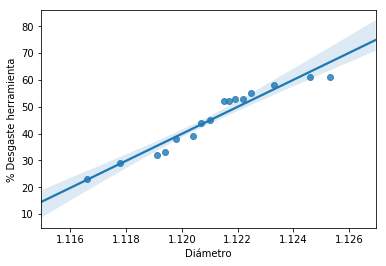

In [56]:
sns.regplot(x="Diámetro", y="% Desgaste herramienta", data=data_regresion)

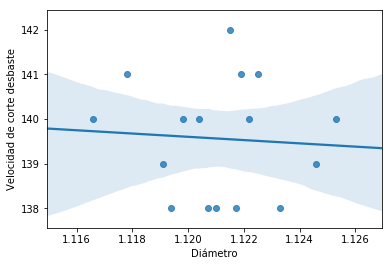

In [57]:
sns.regplot(x="Diámetro", y="Velocidad de corte desbaste", data=data_regresion)

In [58]:
X = data_regresion[['% Desgaste herramienta']]
y = data_regresion[["Diámetro"]]

X = sm.add_constant(X)
resultados = sm.OLS(y, X).fit()

resultados.summary()

/home/eduardo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diámetro   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     216.9
Date:                Fri, 27 Oct 2017   Prob (F-statistic):           6.48e-10
Time:                        18:20:33   Log-Likelihood:                 97.427
No. Observations:                  16   AIC:                            -190.9
Df Residuals:                      14   BIC:                            -189.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.1126      0.001   1870.147      0.000       1.111       1.114
% Desgaste herramienta     0.0002   1.27e-05     14.729      0.000       0.000       0.000
==============================================================================
Omnibus:                        1.833   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.141
Skew:                           0.644   Prob(JB):                        0.565
Kurtosis:                       2.769   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""